In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

In [7]:
# Load dataset
data = pd.read_excel('Words.xlsx', sheet_name='Sheet1')

In [8]:
# Preprocessing: Convert list of words to a single string
data['Words'] = data['Words'].apply(lambda x: ' '.join(eval(x)))  # Pastikan x dalam bentuk string
X = data['Words']
y = data['Label']

In [10]:
# Split data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [12]:
# Train Multinomial Naïve Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_vec, y_train)

MultinomialNB()

In [13]:
# Predict on test data
y_pred = mnb.predict(X_test_vec)

In [14]:
# Combine test results
X_test_combined = pd.DataFrame({
    'Original_Text': X_test.reset_index(drop=True),
    'Prediction': y_pred
})

In [15]:
print("Hasil Klasifikasi dari data Testing:")
print(X_test_combined.head())

Hasil Klasifikasi dari data Testing:
                                       Original_Text         Prediction
0  didebat pertama ini sdh keliatan wan abud alia...     pendukung_anis
1                        anis pandai cakap kosong 😂😂     pendukung_anis
2                                              anies     pendukung_anis
3  semangat pak aniespak prabowo dan pak ganjar 😍😍🇮🇩  pendukung_prabowo
4               anies presiden indonesia 2024 aamiin     pendukung_anis


In [16]:
# Save results to an Excel file
X_test_combined.to_excel('hasil_klasifikasi_data_testing.xlsx', index=False)
print("Hasil Klasifikasi telah disimpan ke 'hasil_klasifikasi_data_testing.xlsx'.")

Hasil Klasifikasi telah disimpan ke 'hasil_klasifikasi_data_testing.xlsx'.


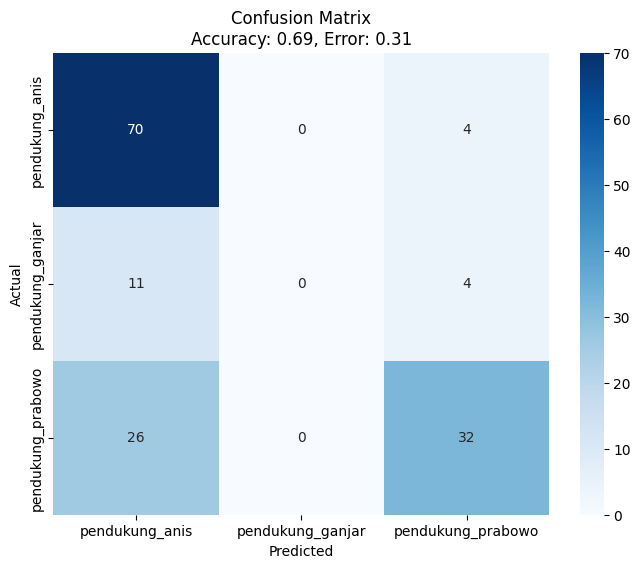

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

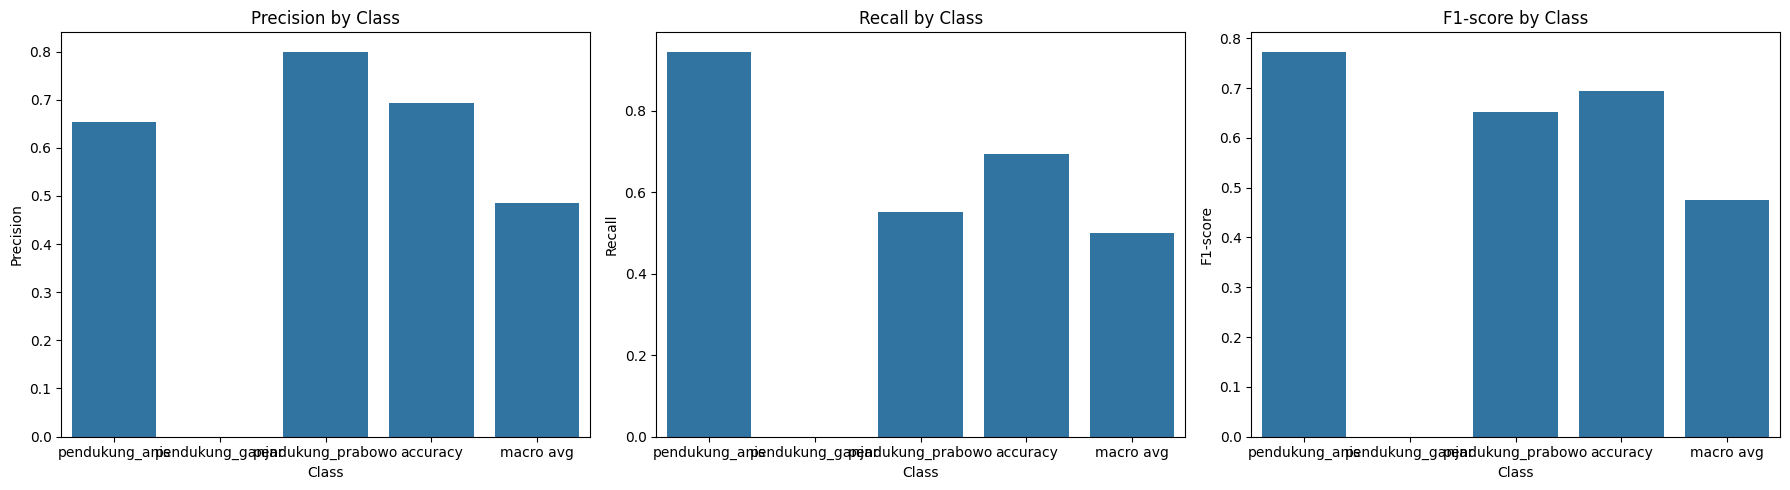

In [20]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
error_score = 1 - accuracy

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mnb.classes_, yticklabels=mnb.classes_)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, Error: {error_score:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and f1-score
metrics = ['precision', 'recall', 'f1-score']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, metric in enumerate(metrics):
    sns.barplot(x=report_df.index[:-1], y=report_df[metric][:-1], ax=axes[i])
    axes[i].set_title(f'{metric.capitalize()} by Class')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(metric.capitalize())

plt.tight_layout()
plt.show()

/var/folders/6s/kzp3m1cx55j_c4rlk6x75d840000gn/T/ipykernel_50446/1180460808.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=data, palette='Set2')


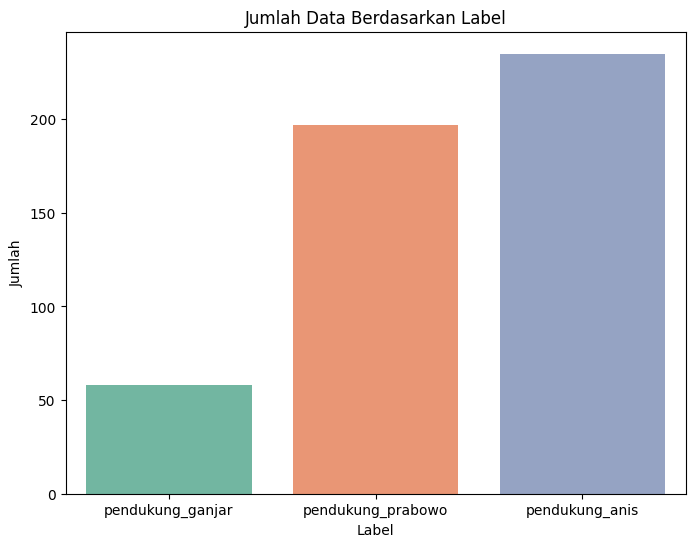

In [21]:
# Display the count of each label in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=data, palette='Set2')
plt.title('Jumlah Data Berdasarkan Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')
plt.show()

/var/folders/6s/kzp3m1cx55j_c4rlk6x75d840000gn/T/ipykernel_50446/3539770984.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="viridis")
/var/folders/6s/kzp3m1cx55j_c4rlk6x75d840000gn/T/ipykernel_50446/3539770984.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="viridis")
/var/folders/6s/kzp3m1cx55j_c4rlk6x75d840000gn/T/ipykernel_50446/3539770984.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), ax=ax

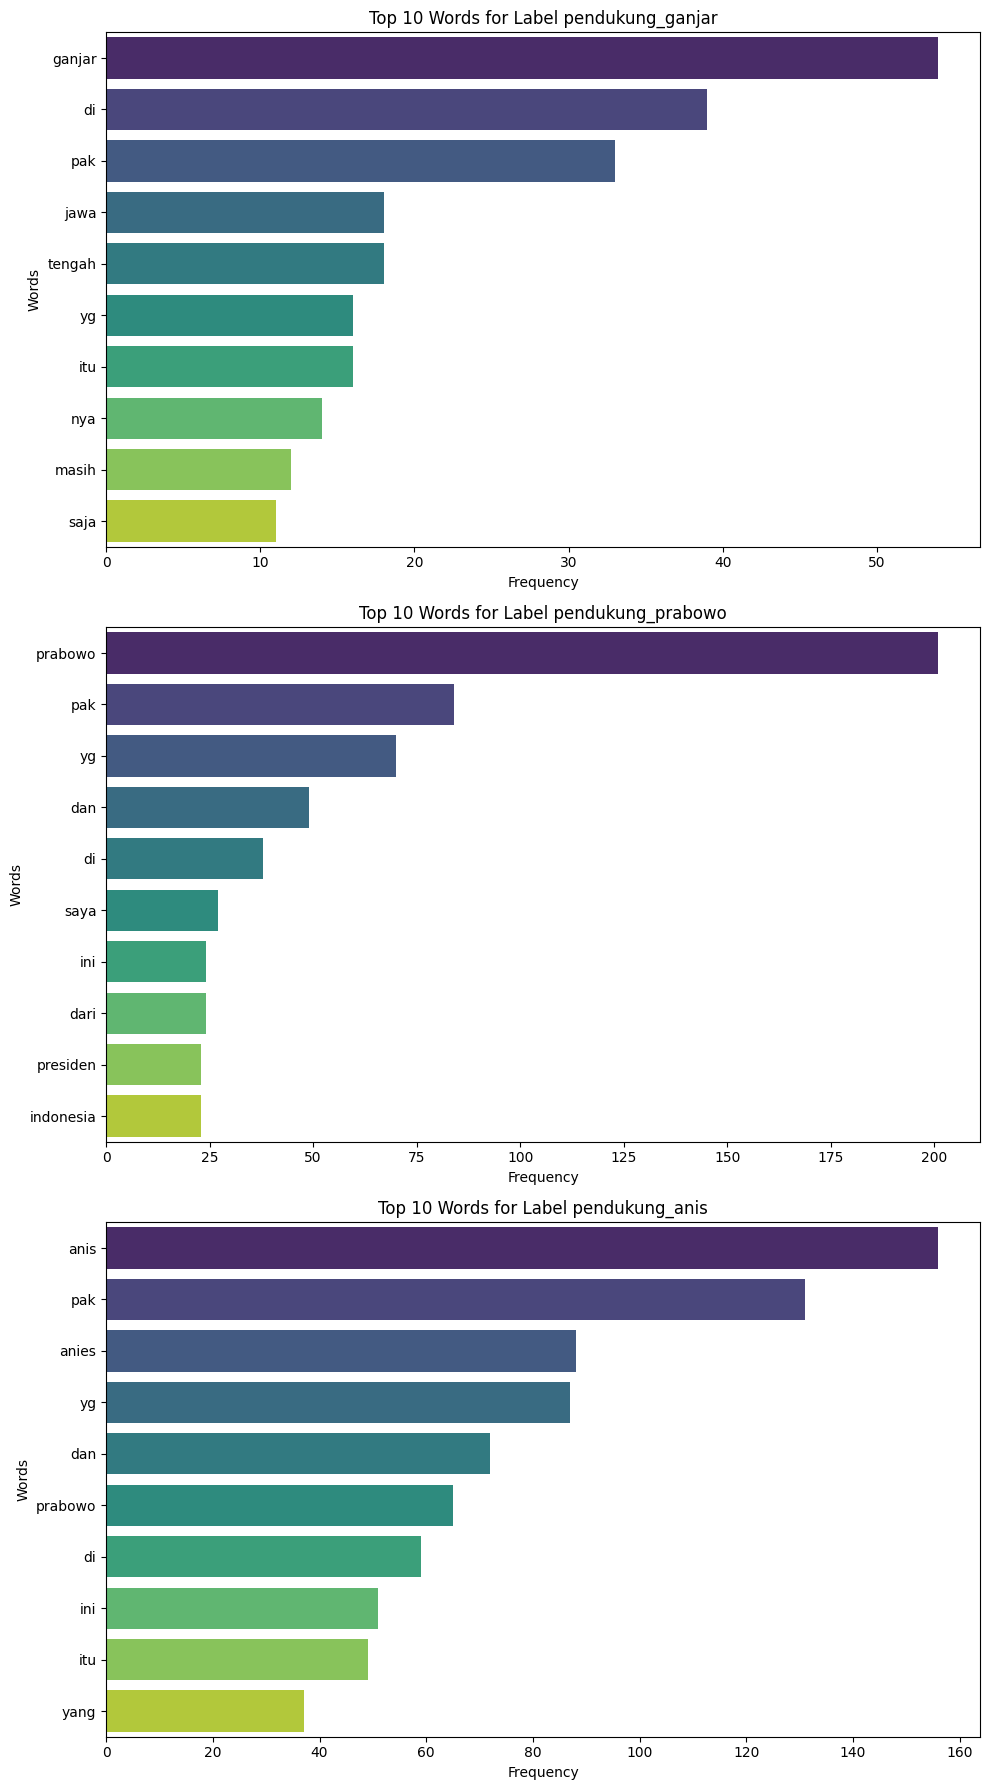

In [22]:
# Pastikan Label dalam bentuk string
data['Label'] = data['Label'].astype(str)

# Get words for each label
words_by_label = {label: [] for label in data['Label'].unique()}

# Collect words for each label
for i, row in data.iterrows():
    words_by_label[row['Label']].extend(row['Words'].split())

# Plot top 10 most frequent words for each label
fig, axes = plt.subplots(len(words_by_label), 1, figsize=(10, len(words_by_label) * 6))

# Jika hanya ada satu label, jadikan axes iterable
if len(words_by_label) == 1:
    axes = [axes]

for i, (label, words) in enumerate(words_by_label.items()):
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(10)  # Get top 10 most common words
    
    # Pisahkan word dan count untuk plot
    words, counts = zip(*most_common_words)
    
    sns.barplot(x=list(counts), y=list(words), ax=axes[i], palette="viridis")
    axes[i].set_title(f'Top 10 Words for Label {label}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Words')

plt.tight_layout()
plt.show()

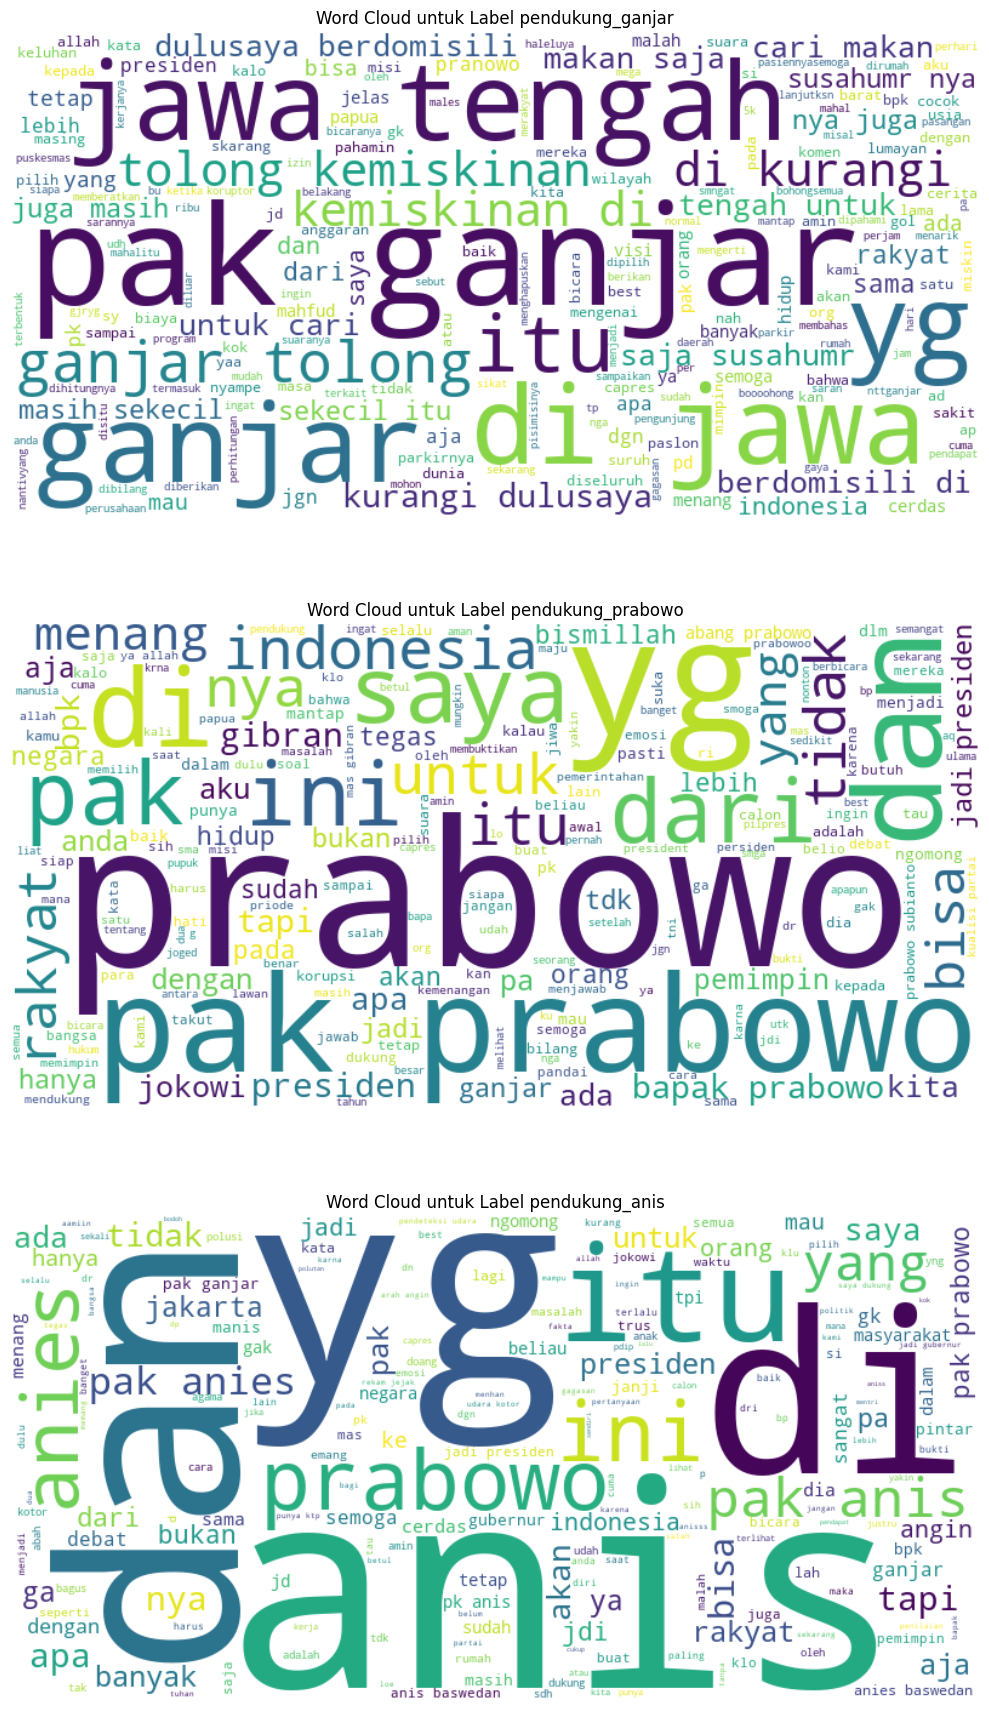

In [23]:
# Buat Word Cloud untuk setiap label
fig, axes = plt.subplots(len(words_by_label), 1, figsize=(10, len(words_by_label) * 6))

# Jika hanya ada satu label, jadikan axes iterable
if len(words_by_label) == 1:
    axes = [axes]

for i, (label, words) in enumerate(words_by_label.items()):
    text = ' '.join(words)  # Gabungkan kata-kata menjadi satu string
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f'Word Cloud untuk Label {label}')

plt.tight_layout()
plt.show()